<a href="https://colab.research.google.com/github/Yunkoo-GIT/Programming/blob/main/20210929_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255

fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(fft, axes=[0, 1])
sz = 25
mask = np.zeros(fft.shape, np.uint8)
mask[image.shape[0]//2-sz:image.shape[0]//2+sz,
     image.shape[1]//2-sz:image.shape[1]//2+sz, :] = 1
fft_shift *= mask
fft = np.fft.ifftshift(fft_shift, axes=[0, 1])

filtered = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
mask_new = np.dstack((mask, np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)))

plt.figure()
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('no high frequencies')
plt.imshow(filtered, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('mask')
plt.imshow(mask_new*255, cmap='gray')
plt.tight_layout(True)
plt.show()

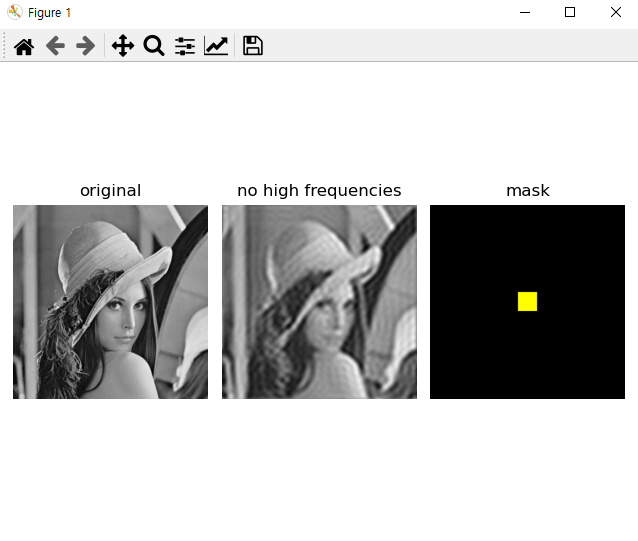